In [2]:
import pandas as pd
import dvc.api

In [3]:
df = pd.read_json(dvc.api.get_url(
    'datasets/data/query/top_used_wish_queries.json',
    repo='git@github.com:ContextLogic/multitask-llm-rnd.git'
), lines=True)

In [7]:
df_cats = pd.read_json('../../models/multitask_multimodal_multilingual/version_9/clm-epoch=1-step=2600--wish_top_800k_queries--predict.json', lines=True)

In [9]:
df_cats_group = df_cats.groupby('batch_indices').agg({ 
    "prediction_decoded": lambda x: [i for i in x], 
    "rank_indices": lambda x: [i for i in x]
})

In [11]:
df_cats_group = df_cats_group.reset_index()

In [12]:
df

,query,cnt,gmv
0,iphone 12 pro max,727317,1.043449e+06
1,smart watch,716676,1.064979e+06
2,iphone,673123,7.356624e+05
3,dildo,648783,2.812065e+05
4,sex toys,645230,3.470768e+05
...,...,...,...
803002,industrial shelf,101,1.130594e+02
803003,parasoles coche,101,4.369584e+01
803004,sunglass face shield,101,4.403885e+02
803005,chinese mesh slippers for women,101,6.284896e+01


In [15]:
df_cats_group = df_cats_group.sort_values('batch_indices')

In [17]:
df_cats_group['query'] = df['query']

In [19]:
df_cats_group.rank_indices.apply(lambda x: x[0] == 0).all()

True

In [21]:
df_meta = pd.read_csv(dvc.api.get_url(
    'datasets/data/attribute_extraction_metadata_template/attribute_definition_top25L2_filtered_augmented_01162023.csv',
    repo='git@github.com:ContextLogic/multitask-llm-rnd.git'
))

In [23]:
valid_cats = set(df_meta['category'].apply(lambda x: x.lower().strip()))

In [27]:
df_cats_group_sub = df_cats_group[(df_cats_group['prediction_decoded'].apply(lambda x: x[0] in valid_cats)) & (df_cats_group['query'].apply(lambda x: x.count(" ") > 2))]

In [30]:
len(df_cats_group_sub)

41388

<AxesSubplot: ylabel='prediction_decoded'>

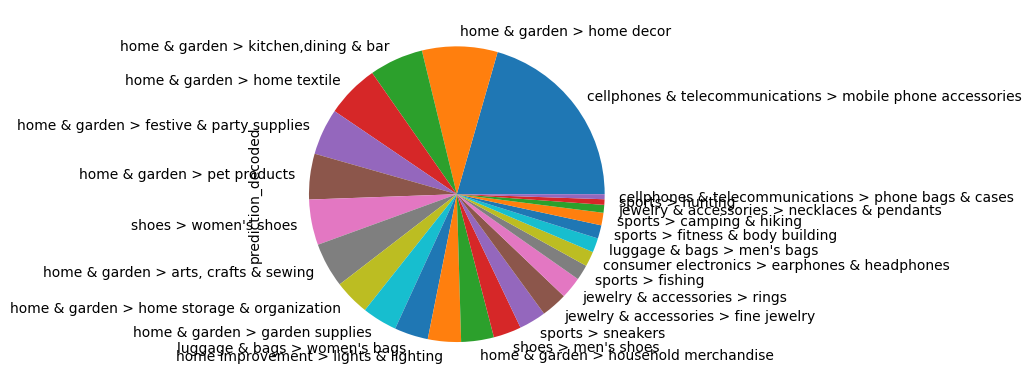

In [29]:
df_cats_group_sub.prediction_decoded.apply(lambda x: ' > '.join(x[0].split(' > ')[:2])).value_counts().plot.pie()